# Problem 1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LinearRegression

sb.set()

In [5]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
houseGrLivArea = pd.DataFrame(houseData['GrLivArea']) 
houseSalePrice = pd.DataFrame(houseData['SalePrice'])

<Figure size 1440x1440 with 0 Axes>

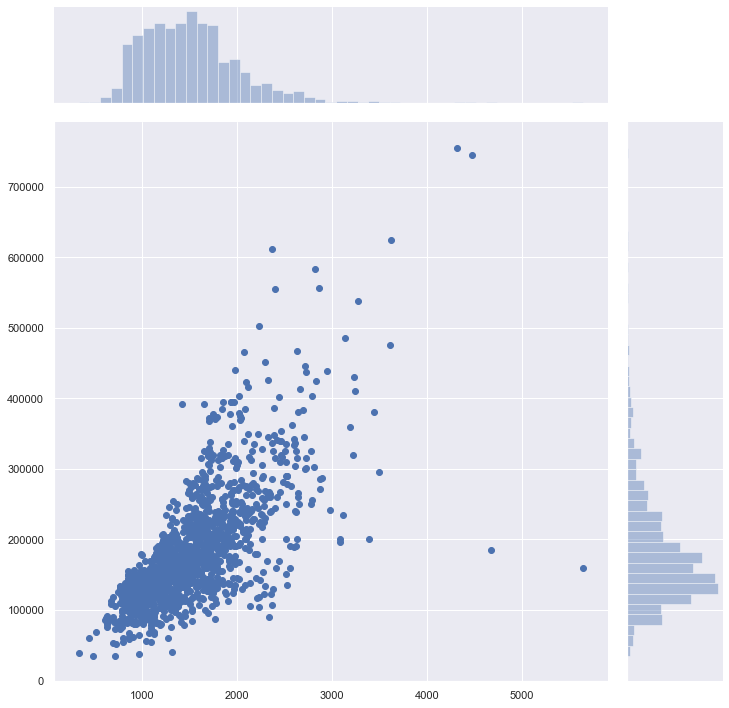

In [53]:
plt.figure(figsize = (20,20))

sb.jointplot(houseGrLivArea,houseSalePrice,height=10)

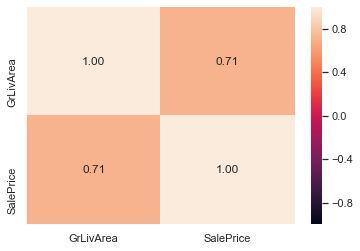

In [13]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([houseGrLivArea, houseSalePrice], axis = 1, join_axes = [houseSalePrice.index])

# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [25]:
houseGr_train = houseGrLivArea[:1100]
houseSale_train = houseSalePrice[:1100]

houseGr_test = houseGrLivArea[-360:]
houseSale_test = houseSalePrice[-360:]


In [26]:
linreg = LinearRegression()

In [27]:
linreg.fit(houseGr_train,houseSale_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [9498.33463562]
Coefficients 	: a =  [[113.88950443]]


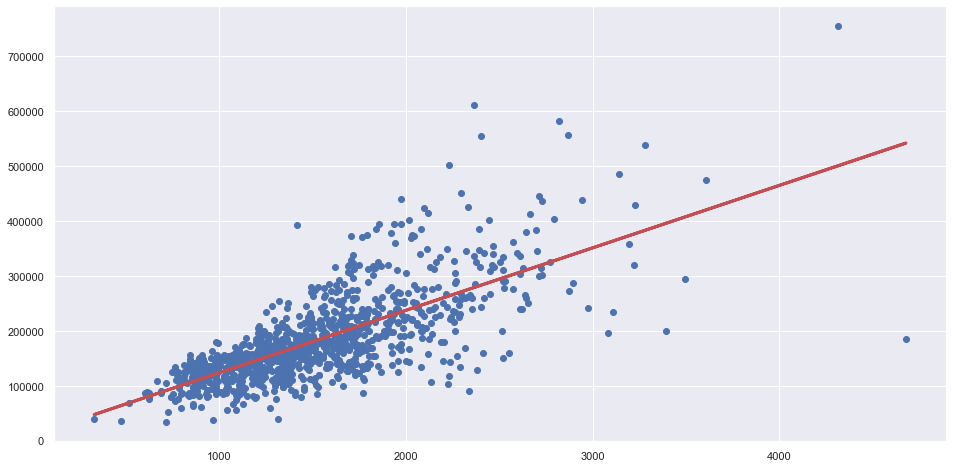

In [29]:
# Formula for the Regression line
regline_x = houseGr_train
regline_y = linreg.intercept_ + linreg.coef_ * houseGr_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGr_train, houseSale_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

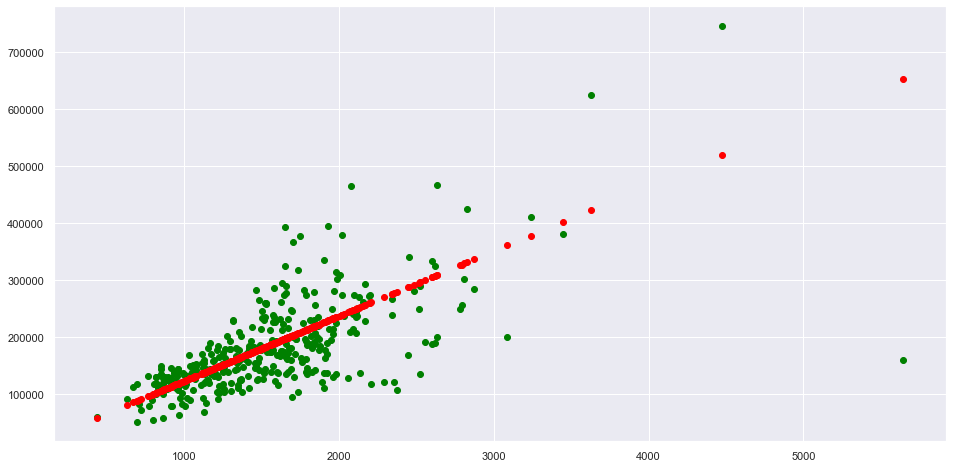

In [30]:
# Predict Total values corresponding to HP Test
total_test_pred = linreg.predict(houseGr_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGr_test, houseSale_test, color = "green")
plt.scatter(houseGr_test, total_test_pred, color = "red")
plt.show()

In [31]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(houseGr_test, houseSale_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(houseSale_test, total_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.40117720006925806
Mean Squared Error (MSE) 	: 3737081522.296089
Root Mean Squared Error (RMSE) 	: 61131.67364219705


In [48]:
def printAllRegression(x,y = houseSalePrice):
    x_train = x[:1100]
    y_train = y[:1100]

    x_test = x[-360:]
    y_test = y[-360:]
    
    linreg = LinearRegression()
    linreg.fit(x_train,y_train)
    
    # Coefficients of the Linear Regression line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
        # Formula for the Regression line
    regline_x = x_train
    regline_y = linreg.intercept_ + linreg.coef_ * x_train

    # Plot the Linear Regression line
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    plt.title('Linear Regression on Train data')
    plt.scatter(x_train, y_train)
    plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
    plt.show()

    # Predict Total values corresponding to HP Test
    total_test_pred = linreg.predict(x_test)

    # Plot the Predictions
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    plt.title('Linear Regression on Test data')
    plt.scatter(x_test, y_test, color = "green")
    plt.scatter(x_test, total_test_pred, color = "red")
    plt.show()

    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))

    mse = mean_sq_err(y_test, total_test_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))


## Linear regression between LotArea to SalePrice

Intercept 	: b =  [160963.95370929]
Coefficients 	: a =  [[1.91881242]]


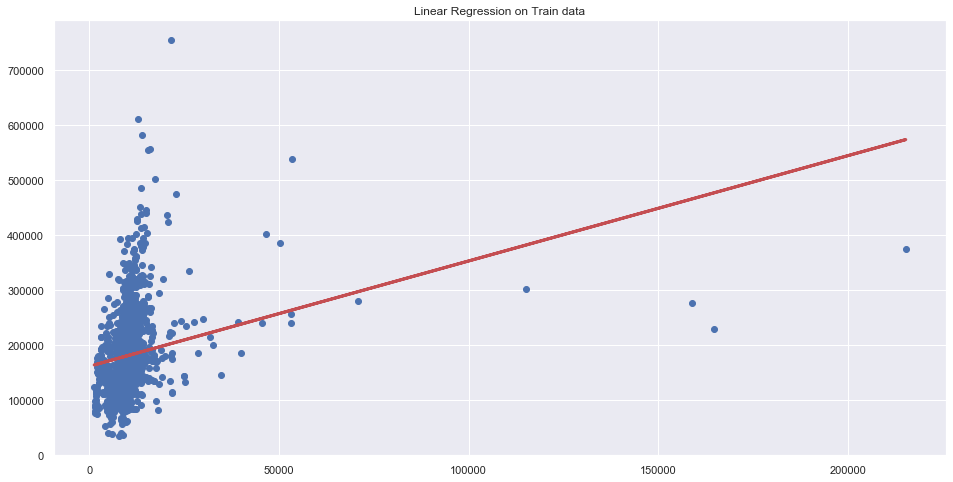

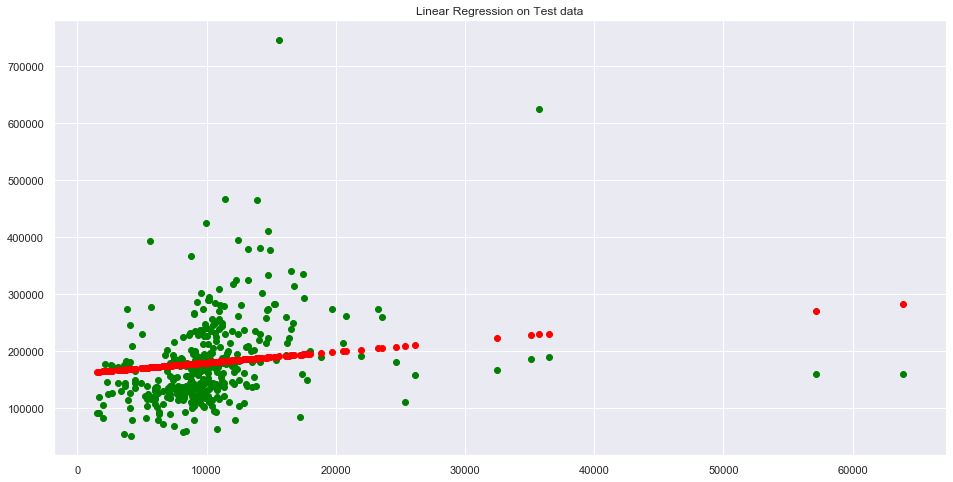

Explained Variance (R^2) 	: 0.0661786844889618
Mean Squared Error (MSE) 	: 5827711275.733227
Root Mean Squared Error (RMSE) 	: 76339.44770387867


In [49]:
printAllRegression(pd.DataFrame(houseData['LotArea']) )

## Linear regression between TotalBsmtSF to SalePrice

Intercept 	: b =  [54361.70161283]
Coefficients 	: a =  [[120.19979559]]


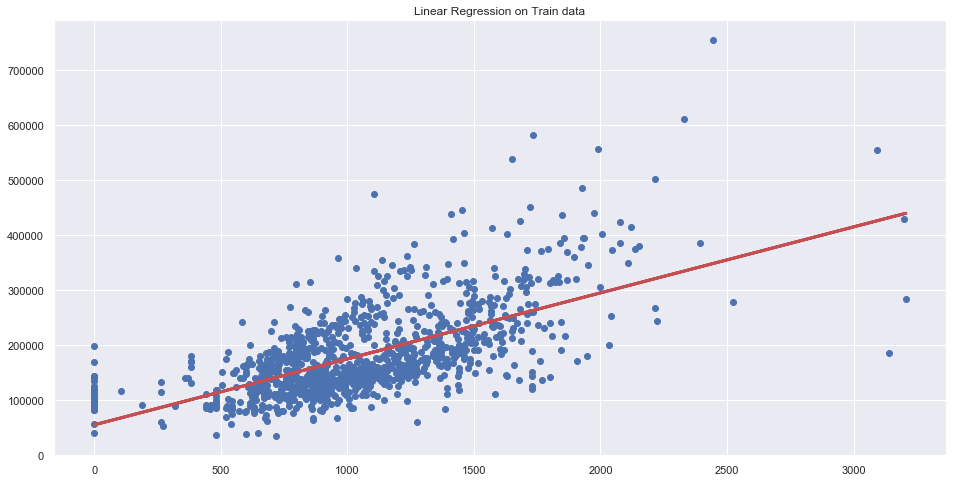

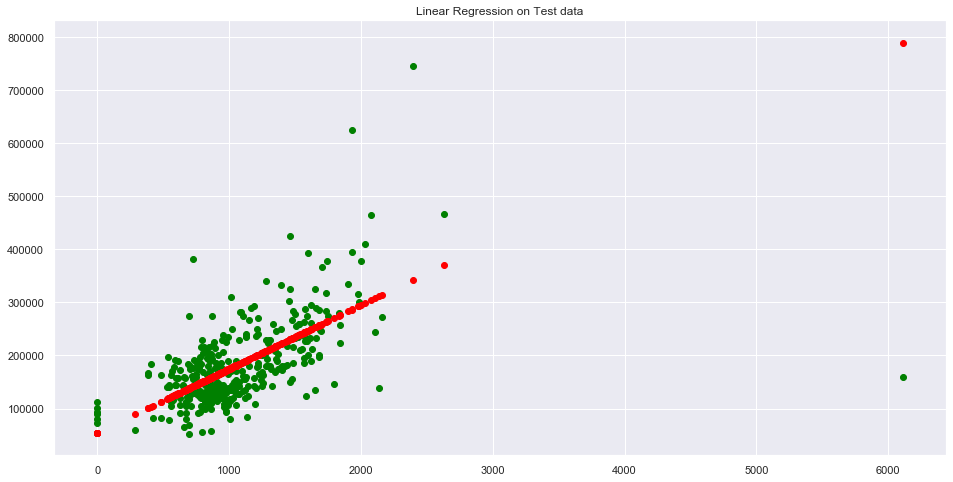

Explained Variance (R^2) 	: 0.26305378699344206
Mean Squared Error (MSE) 	: 4599070168.790179
Root Mean Squared Error (RMSE) 	: 67816.44467819128


In [50]:
printAllRegression(pd.DataFrame(houseData['TotalBsmtSF']) )

## Linear regression between GarageArea to SalePrice

Intercept 	: b =  [67131.98072434]
Coefficients 	: a =  [[241.42776434]]


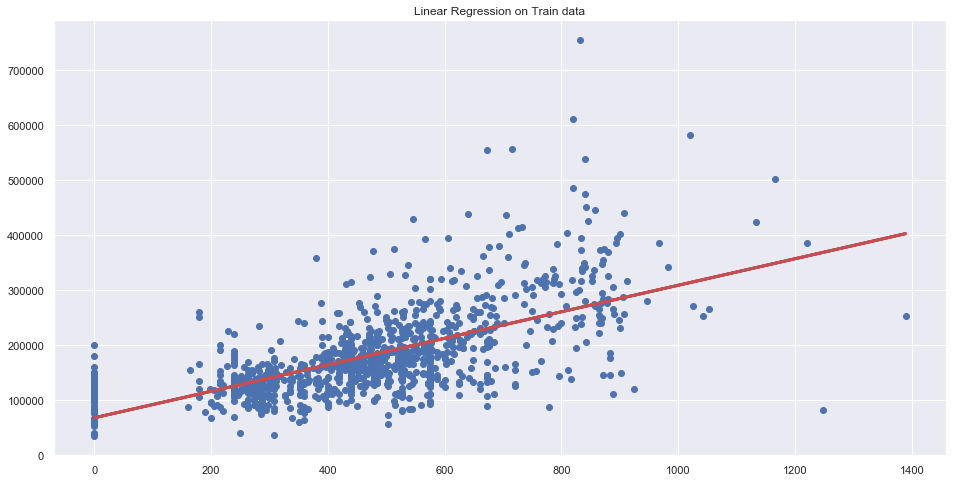

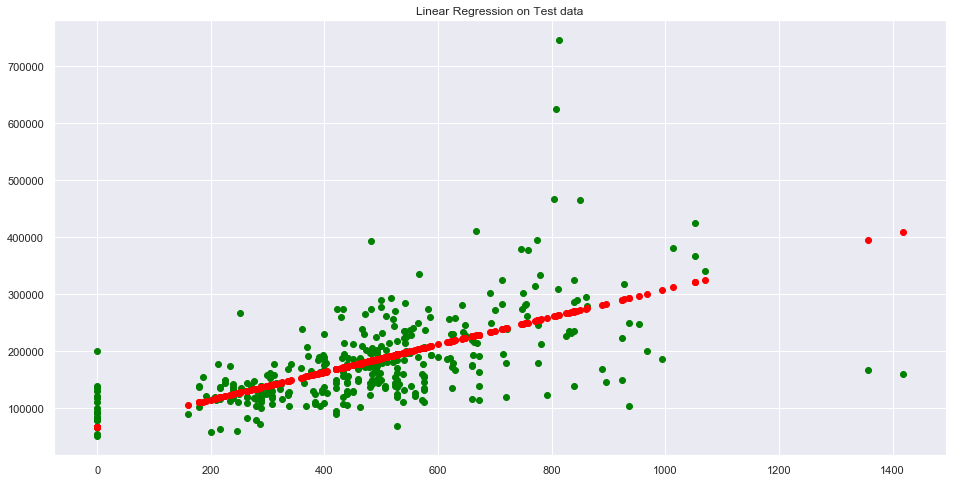

Explained Variance (R^2) 	: 0.33415894889143827
Mean Squared Error (MSE) 	: 4155323226.122655
Root Mean Squared Error (RMSE) 	: 64461.796640511464


In [52]:
printAllRegression(pd.DataFrame(houseData['GarageArea']) )